Task-2A: For 05.02 (First Part), please apply a cross-validation approach (cv=5) on the iris dataset, then please provide the confusion matrix for the outputs and discuss the difference between the true values and predicted values.

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

In [5]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [6]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()                       
model.fit(Xtrain, ytrain)                  
y_predict = model.predict(Xtest)      

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_predict)

0.9736842105263158

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_iris, y_iris, cv=5)

array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ])

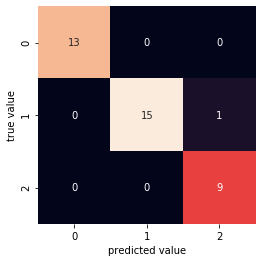

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

mat = confusion_matrix(ytest, y_predict)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

The accuracy score value of the Gaussian naive Bayes model, that is, the success of predicting untrained data, was calculated as 97 percent.

When we divide the same iris data set into smaller parts and set cv = 5, we can perform train and test operations on small parts. As a result of this crosss validation method, 5 different accuracy values were obtained. In fact, when we calculate the average based on these five values, it again shows us the success rate of the model. As an average, the success rate of the model can be stated as 95 percent.

When we look at the confusion matrix, the model established correctly predicted 13 samples with a real value of 0.
Again, the model correctly predicted 15 samples with a real value of 1, namely the label of 1. For an example, it was actually labeled as 1 but model predicted as 2.
The 9 samples labeled as 2 are labeled as 2 in the model.



Task-2B: There was a classification example on the digits dataset (05.02). Please do this example with cross-validation (cv=10) with the same algorithm (Gaussian Naive Bayes) but this time please provide two routes one with Isomap and the other with Principal Component Analysis (PCA). Please set the number of components as 5 for both of the dimensionality reduction routes. Then finally compare their results on the basis of accuracy scores supported with confusion matrices.  

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()

In [16]:
X = digits.data
X.shape

(1797, 64)

In [17]:
y = digits.target
y.shape

(1797,)

### Isomap

In [18]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=5)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 5)

In [19]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(data_projected, y, random_state=0)

In [20]:
Xtrain.shape

(1347, 5)

In [21]:
ytrain.shape

(1347,)

In [22]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9466666666666667

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, data_projected, y, cv=10)

array([0.92222222, 0.97777778, 0.92222222, 0.85      , 0.95      ,
       0.87777778, 0.97777778, 0.99441341, 0.89944134, 0.94972067])

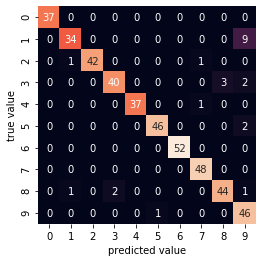

In [25]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

The success rate of the model we set up over the data set we obtained after dimensionality reduction (5 feature) using the Isomap method is 95 percent.

The train and test results made by dividing the data into 10 parts with cross validation have an average success rate of 93 percent.

When we look at the confusion matrix, we can say that especially for the value 9; For 9 samples with 9 in the actual dataset, the model predicted as 1.

### Principal Component Analysis (PCA)

In [26]:
from sklearn.decomposition import PCA  
model = PCA(n_components=5)            
model.fit(digits.data)                     
X_5D = model.transform(digits.data) 
X_5D.shape

(1797, 5)

In [27]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_5D, y, random_state=0)

In [28]:
Xtrain.shape

(1347, 5)

In [29]:
ytrain.shape

(1347,)

In [30]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8466666666666667

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_5D, y, cv=10)

array([0.82222222, 0.89444444, 0.81111111, 0.81666667, 0.84444444,
       0.78888889, 0.86111111, 0.82122905, 0.74860335, 0.84916201])

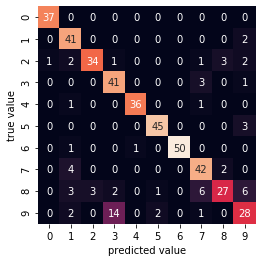

In [33]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

Likewise, after the dimensionality reduction we made using the pca method, when we put our data into the model, the success rate we achieved was 85 percent.

When compared to the result we obtained using the previous isomap method, we can say that this model has a lower success rate.

When we look at the confusion matrix, this matrix actually shows us how much of the true values are correctly predicted.
For example, for 6, we can say that all were correctly estimated. There is no loss. But when we look at 9, out of 42 samples with a real value of 9, it is estimated as 3 for 14 of them. There are also other values that the model predicts as 9. The value 3 of 5 is called 9. The value 2 of 2 is called 9. the value 2 of 1 and the value 6 of 8 is called 9.

bu matris bize aslında gerçek değerlerin ne kadarının doğru tahmin edildiğini göstermekte. Örneğin 6 için hepsi doğru tahmin edilmiş diyebiliriz. Kayıp yok. Fakat 9 a baktığımızda gerçek değeri 9 olan 42 tane örnekten 14 tanesi için 3 olarak tahmininde bulunmuş. Ayrıca modelin 9 olarak tahmin ettiği başka değerler de mevcut. 3 tane 5 değerine de 9 demiş.2 tane 2 değerine de 9 demiş.2 tane 1 e de 9 demiş, 6 tane 8 değerine de 9 demiş.

Task-2C: Please propose the critical issues for selecting the best model among several different models. For which model would you claim the best one? How do you decide that? What would be the critical aspects under consideration? Please refer to the central concepts including bias, variance, underfit and overfit, training score, validation score, model complexity, learning curve, good fit. 

For the critical issues we will consider in order to choose the best model, we can list the following.
- The established model can be very complex. Or may not be complex enough

- The size of the data set being trained may not be sufficient. It may be necessary to increase the size of the data set.

- The model may be working with less features. It may be necessary to train the model with more features.

Variance occurs when the model performs well in the training dataset but does not perform well in an untrained dataset, such as a test dataset or validation dataset. Variance tells us how dispersed the predicted value from the true value is.
A model with high variance tries to fit most of the data points, which makes the model complex and difficult to model.

Bias is how far predicted values are from true values. If the predicted values are far from the true values, the bias is high.

Underfit : Unlike over-learning, if a model has insufficient learning, it means that the model does not fit the training data and therefore misses trends in the data. It also means that the model cannot be generalized to new data. this problem is usually the result of a very simple model so we can call it a lack of underestimating independent variables.
Models with underfitting problems have a high error rate in both training and test data sets. It has low variance and high bias. Instead of following training data too closely, these models ignore lessons learned from training data and fail to learn the basic relationship between inputs and outputs.

Overfit : If our model has begun to memorize our dataset for training, or if our training set is uniform, the risk of overfitting is high. When we show our test data to this model where we got a high score on the training set, we will probably get a very low score. Because the model memorized the situations in the training set and searches for these situations in the test data set. Since memorized situations cannot be found in the slightest change, you can get very bad prediction scores in the test data set. Models with overfitting problems show high variance and low bias.

Depending on whether the model is underfit or overfit, training and validation scores are also very important. An underfit model is a high-bias model and its training score and validation scores are similar. An overfit model is a high-variance model and its validation score is much worse than the training score.

We wouldn't worry too much about an underfitted model, and we would have proven that the model failed. But since an overfitting model is considered successful, we need to prove how successful it actually is. In such cases, we need to validate the model. For this, we can use the cross validation method.

For a moderately complex model, we can call the best model to the point where the validation score value is optimum.


Task-2D: Please apply an example for the grid search on a dataset of your own interest and choice. Please apply a suitable algorithm with different parameters and please apply at least 60 parameters (for instance 3*4*5 different values for 3 different parameters) and then find the best parameters. Then apply the algorithm with the best parameters with respect to different parameters and discuss why these parameters are the best ones. You can use cv = 5.

For this task we can use the breast_cancer dataset provided by the sklearn library.

In [104]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [105]:
X = cancer.data
X.shape

(569, 30)

In [106]:
y = cancer.target
y.shape

(569,)

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [108]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

print("Default Parameters ")
print(model.get_params())

Default Parameters 
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [109]:
#for instance 3*4*5 different values for 3 different parameters
bootstrap_v = [True, False, True]
criterion = ['gini', 'entropy']
max_features_v = ['sqrt', 'log2']
n_estimators_v = list(range(100,2000,400))
#min_sample_leaf_v = list(range(1,5,2))

In [110]:
grid_params  = {
    'bootstrap' : bootstrap_v,
    'criterion' : criterion,
    'max_features' : max_features_v,
    'n_estimators' : n_estimators_v
}

print("Tuning Parameters")
print(grid_params)

Tuning Parameters
{'bootstrap': [True, False, True], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2'], 'n_estimators': [100, 500, 900, 1300, 1700]}


In [111]:
grid_search = GridSearchCV(estimator=model, param_grid=grid_params, cv=5, verbose=1)

In [112]:
grid_search.fit(X_train, y_train)

print('Best Parameters for our classsifier')
print(grid_search.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  6.0min finished


Best Parameters for our classsifier
{'bootstrap': False, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 500}


In [115]:
#Evaluation of base Model
model = RandomForestClassifier()
model=model.fit(X_train, y_train)
predict = model.predict(X_test)
report = classification_report(y_test, predict)
score = accuracy_score(y_true= y_test, y_pred=predict)
print(report)
print("{} {:0.2f}%".format("Accuracy Score : ", score*100))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        48
           1       0.96      0.98      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy Score :  96.49%


In [116]:
#Evaluation of best Estimator Selected from GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
predict = grid_search.best_estimator_.predict(X_test)
report = classification_report(y_test, predict)
score = accuracy_score(y_true= y_test, y_pred=predict)
print(report)
print("{} {:0.2f}%".format("Accuracy Score : ", score*100))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.96      1.00      0.98        66

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy Score :  97.37%


The Base Model accuracy was 96.49% but after hyperparameter tuning that is selecting best estimator parameters, the accuracy increased to 97.37% on Tuned Model.

This is a significant increase in accuracy.